In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import sklearn
import keras
import scipy
import pickle
%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.preprocessing import  OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot

# 1. Загружаем исходные данные 

In [5]:
#Загружаем датасет INFO
ruta1 = 'C:/Alejandro/info_contrib.xlsx'
info_contrib = pd.read_excel(ruta1)
info_contrib.shape

(2156, 8)

In [6]:
# 2 налог на продажу (imp_ingreso)
ruta2 = 'C:/Alejandro/imp_ingreso.xlsx'
imp_ingreso = pd.read_excel(ruta2)
imp_ingreso.shape

(2156, 13)

In [7]:
# 3 налог на рабочую силу и социальное обеспечение (imp_salario)
ruta3 = 'C:/Alejandro/imp_salario.xlsx'
imp_salario = pd.read_excel(ruta3)
imp_salario.shape

(2156, 13)

In [8]:
# 4 проверка Нарушение от уплаты налогов
ruta4 = 'C:/Alejandro/auditoria.xlsx'
auditoria = pd.read_excel(ruta4)
auditoria.shape

(2156, 2)

#### 1.1 переименовываем столбцы

In [9]:
new_names = {'Idcontribuyente': 'id', 'Edad': 'Возраст', 'Sexo': 'Пол', 'MIPYME': 'Компания','Actividad': 'Деятельность', 'Inscripcion': 'Регистрация', 'Trabajadores': 'Сотрудники', 'Ubicacion': 'Местонахождение'}  
info_contrib = info_contrib.rename(columns=new_names)
info_contrib.head()

,id,Возраст,Пол,Компания,Деятельность,Регистрация,Сотрудники,Местонахождение
0,1,41,Masculino,Micro,Construccion,2022-03-12,5,Occidente
1,2,43,Masculino,Pequeña,Construccion,2022-05-08,30,Centro
2,3,47,Masculino,Pequeña,Gastronomicos,2022-04-05,31,Centro
3,4,36,Masculino,Micro,Construccion,2022-02-14,6,Occidente
4,5,42,Masculino,Pequeña,Gastronomicos,2021-11-11,22,Occidente


In [10]:
new_names = {'Idcontribuyente': 'id', 'Enero': 'Январь', 'Febrero': 'Февраль' , 'Marzo': 'Март', 'Abril': 'Апрель', 'Mayo': 'Май', 'Junio': 'Июнь', 'Julio': 'Июль', 'Agosto': 'Август', 'Septiembre': 'Сентябрь', 'Octubre': 'Октябрь', 'Noviembre': 'Ноябрь', 'Diciembre': 'Декабрь', }
imp_ingreso = imp_ingreso.rename(columns=new_names)
imp_ingreso.head()

,id,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
0,1,228485.0,231583.0,227883.0,224055.0,218433.0,217756.0,220297,228083,226939,221586,230104,220983
1,2,1295622.0,1327598.0,1309699.0,1320146.0,1333394.0,1335997.0,1338167,1333049,1302617,1322652,1311463,1317768
2,3,1190168.0,1209205.0,1190435.0,1193072.0,1183155.0,1189882.0,1182446,1203122,1161748,1188487,1170637,1223327
3,4,275082.0,283708.0,276912.0,283177.0,285418.0,285704.0,286413,286244,270626,271593,272354,286293
4,5,1011603.0,1002413.0,974753.0,983996.0,1017701.0,1010577.0,1017118,995798,1012133,1008731,1012448,993869


In [11]:
imp_salario = imp_salario.rename(columns=new_names)
imp_salario.head()

,id,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
0,1,831.25,831.25,831.25,831.25,498.75,831.25,831.25,831.25,831.25,831.25,831.25,831.25
1,2,4567.50,4725.00,4725.00,4567.50,4567.50,4410.00,4725.00,4725.00,4725.00,4567.50,4725.00,4410.00
2,3,1898.75,1898.75,1898.75,1898.75,1618.75,1898.75,1898.75,1898.75,1898.75,1898.75,1898.75,1898.75
3,4,840.00,840.00,840.00,700.00,840.00,840.00,840.00,840.00,840.00,840.00,560.00,840.00
4,5,3465.00,3465.00,3465.00,3465.00,3465.00,3465.00,3465.00,3465.00,3150.00,3465.00,3465.00,3307.50


In [12]:
new_names = {'Idcontribuyente': 'id', 'Evasion': 'Нарушение'}
auditoria = auditoria.rename(columns=new_names)
auditoria.head()

,id,Нарушение
0,1,NO
1,2,NO
2,3,SI
3,4,NO
4,5,NO


#### 1.2 Удаляем колонку с индексом

In [13]:
info_contrib = info_contrib.drop('id', axis=1, inplace=False)
info_contrib.shape

(2156, 7)

In [14]:
imp_ingreso = imp_ingreso.drop('id', axis=1, inplace=False)
imp_ingreso.shape

(2156, 12)

In [15]:
auditoria = auditoria.drop('id', axis=1, inplace=False)
auditoria.shape

(2156, 1)

In [16]:
imp_salario = imp_salario.drop('id', axis=1, inplace=False)
imp_salario.shape

(2156, 12)

#### 1.3 Объединим по индексу, тип объединения INNER, смотрим итоговый датасет

In [17]:
df_contrib = info_contrib.merge(auditoria, left_index = True, right_index = True, how = 'inner')

In [18]:
df_contrib.head()

,Возраст,Пол,Компания,Деятельность,Регистрация,Сотрудники,Местонахождение,Нарушение
0,41,Masculino,Micro,Construccion,2022-03-12,5,Occidente,NO
1,43,Masculino,Pequeña,Construccion,2022-05-08,30,Centro,NO
2,47,Masculino,Pequeña,Gastronomicos,2022-04-05,31,Centro,SI
3,36,Masculino,Micro,Construccion,2022-02-14,6,Occidente,NO
4,42,Masculino,Pequeña,Gastronomicos,2021-11-11,22,Occidente,NO


# 2. Визуализация полей датасет  и нарушению

In [19]:
'''selec_palette = sns.color_palette("viridis", n_colors = 5)
sns.palplot(selec_palette)
plt.show()'''

'selec_palette = sns.color_palette("viridis", n_colors = 5)\nsns.palplot(selec_palette)\nplt.show()'

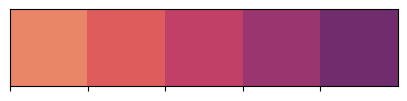

In [20]:
# Мы создаем Палитру
selec_palette = sns.color_palette("flare", n_colors = 5) 
sns.palplot(selec_palette)
plt.show()

Text(0.5, 1.0, 'Типы и количества Компания')

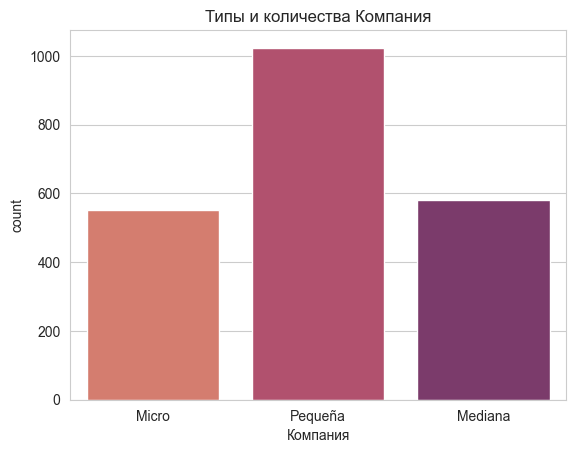

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Компания',data=df_contrib, palette='flare')

plt.title("Типы и количества Компания")

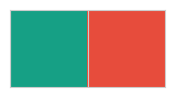

In [22]:
# Мы создаем palette для проверки Нарушение
eva_color = ["#16a085", "#e74c3c"]

sns.palplot(eva_color)
plt.show()

Text(0.5, 1.0, 'Нарушение налогового')

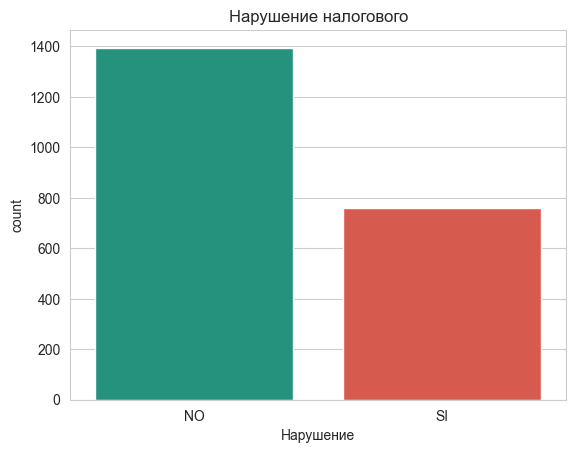

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Нарушение',data=auditoria, palette=eva_color,  saturation=0.80)
plt.title("Нарушение налогового")

Text(0.5, 1.0, 'Нарушение по местоположению')

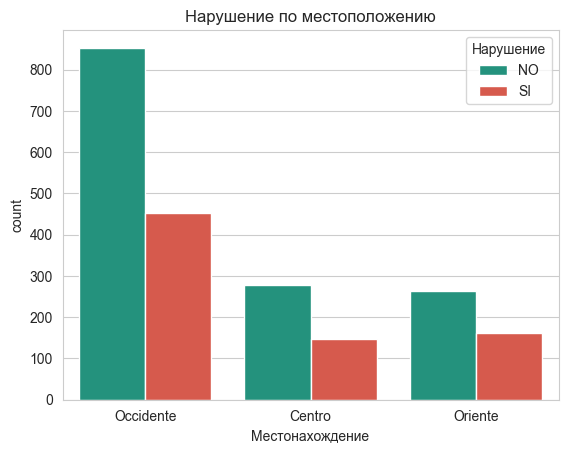

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Местонахождение',data=df_contrib, palette=eva_color, hue = 'Нарушение', saturation=0.80)
plt.title("Нарушение по местоположению")

Text(0.5, 1.0, 'Нарушение по Tипу Kампании')

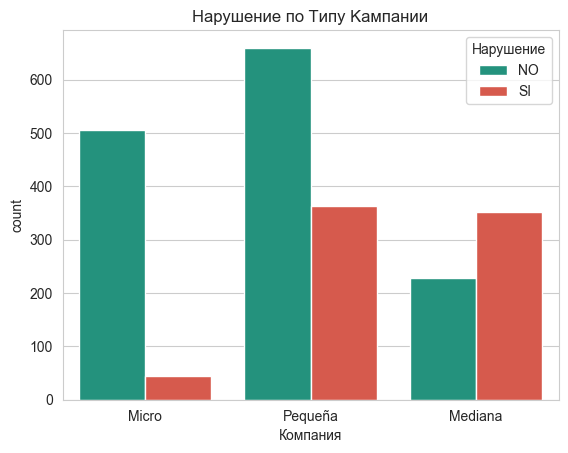

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Компания',data=df_contrib, palette=eva_color,  hue = 'Нарушение', saturation=0.80)
plt.title("Нарушение по Tипу Kампании")

Text(0.5, 1.0, 'Нарушение по Bидам Деятельности')

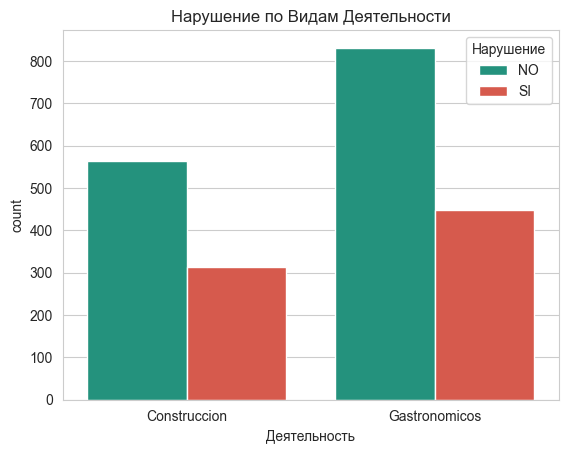

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Деятельность',data=df_contrib, palette=eva_color,  hue = 'Нарушение', saturation=0.80)
plt.title("Нарушение по Bидам Деятельности")

Text(0.5, 1.0, 'Нарушение по Пол')

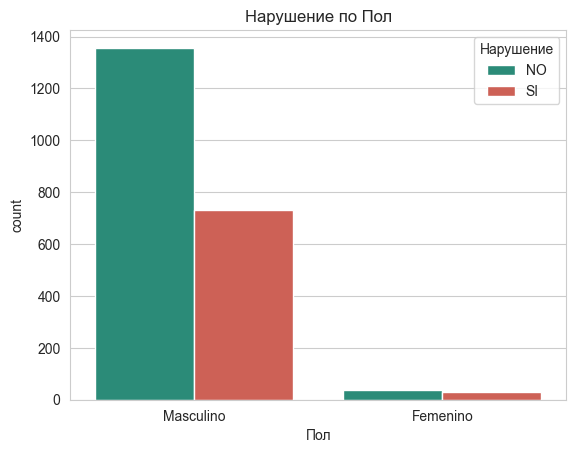

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Пол',data=df_contrib, palette=eva_color, hue = 'Нарушение', saturation=0.70)
plt.title("Нарушение по Пол")

In [28]:
#Мы преобразуем дату в месяцы регистрации до 2023 года
dt = datetime.datetime

for index, row in df_contrib.iterrows():
    fecha = row.Регистрация 
    
    fecha = dt.strptime(fecha, '%Y-%m-%d')
    
    # Obtener el mes de la fecha
    mes = fecha.month
    ano = fecha.year
    meses = int((12-mes)+((2023-(ano+1))*12) )
    df_contrib.loc[index, 'Регистрация'] = meses

In [29]:
df_contrib.head()

,Возраст,Пол,Компания,Деятельность,Регистрация,Сотрудники,Местонахождение,Нарушение
0,41,Masculino,Micro,Construccion,9,5,Occidente,NO
1,43,Masculino,Pequeña,Construccion,7,30,Centro,NO
2,47,Masculino,Pequeña,Gastronomicos,8,31,Centro,SI
3,36,Masculino,Micro,Construccion,10,6,Occidente,NO
4,42,Masculino,Pequeña,Gastronomicos,13,22,Occidente,NO


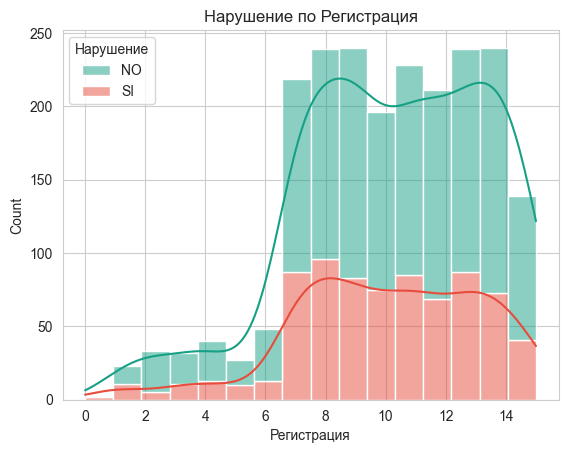

In [30]:
sns.histplot(x = 'Регистрация', data=df_contrib, hue='Нарушение' , kde=True,  palette=eva_color, bins = 16 ,multiple='stack')
plt.title("Нарушение по Регистрация")
plt.show()

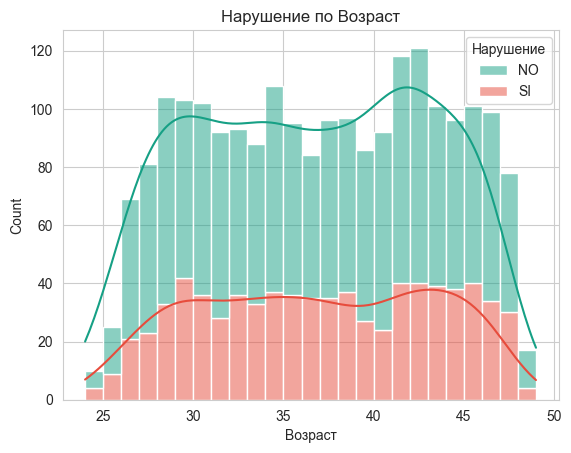

In [31]:
sns.histplot(x = 'Возраст', data=df_contrib, hue='Нарушение' , kde=True,  palette=eva_color, bins = 25 ,multiple='stack')
plt.title("Нарушение по Возраст")
plt.show()

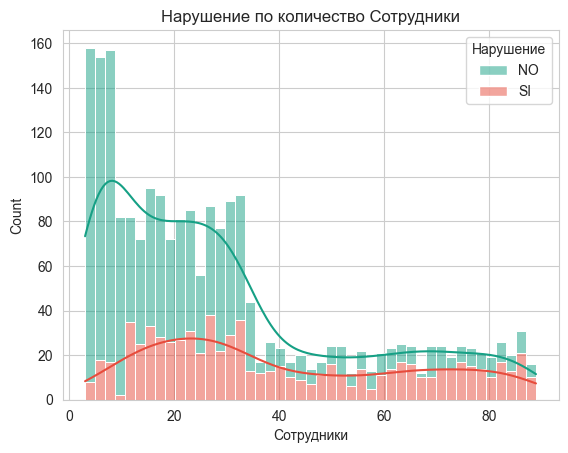

In [32]:
sns.histplot(x = 'Сотрудники', data=df_contrib, hue='Нарушение' , kde=True,  palette=eva_color, bins = 45 ,multiple='stack')
plt.title("Нарушение по количество Сотрудники")
plt.show()

# 3. Проводим разведочный анализ данных

#### 3.1 Поиск уникальных значений с помощью функции nunique

In [33]:
df_contrib.nunique()

Возраст            26
Пол                 2
Компания            3
Деятельность        2
Регистрация        16
Сотрудники         85
Местонахождение     3
Нарушение           2
dtype: int64

#### 3.3 Просмотрим информацию о датасете

In [34]:
df_contrib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Возраст          2156 non-null   int64 
 1   Пол              2156 non-null   object
 2   Компания         2156 non-null   object
 3   Деятельность     2156 non-null   object
 4   Регистрация      2156 non-null   object
 5   Сотрудники       2156 non-null   int64 
 6   Местонахождение  2156 non-null   object
 7   Нарушение        2156 non-null   object
dtypes: int64(2), object(6)
memory usage: 134.9+ KB


#### 3.2 Мы преобразуем категориальные переменны ('Пол', 'Компания', 'Деятельность', 'Регистрация', 'Местонахождение', 'Нарушение') в числовой формат, подходящий для моделей машинного обучения.


In [35]:
# Приведем столбец Нарушение к значениям 0 и 1 и integer
df_contrib = df_contrib.replace({'Нарушение': {'NO' : 0, 'SI': 1}})
df_contrib['Нарушение'] = df_contrib['Нарушение'].astype(int)

In [36]:
df_contrib.head(10)

,Возраст,Пол,Компания,Деятельность,Регистрация,Сотрудники,Местонахождение,Нарушение
0,41,Masculino,Micro,Construccion,9,5,Occidente,0
1,43,Masculino,Pequeña,Construccion,7,30,Centro,0
2,47,Masculino,Pequeña,Gastronomicos,8,31,Centro,1
3,36,Masculino,Micro,Construccion,10,6,Occidente,0
4,42,Masculino,Pequeña,Gastronomicos,13,22,Occidente,0
5,44,Masculino,Mediana,Construccion,8,69,Occidente,0
6,33,Femenino,Pequeña,Gastronomicos,15,30,Oriente,0
7,29,Masculino,Micro,Gastronomicos,13,9,Centro,0
8,35,Masculino,Pequeña,Construccion,13,26,Centro,0
9,29,Masculino,Pequeña,Construccion,7,33,Occidente,0


In [37]:
# Мы создаем экземпляр порядкового кодировщика
encoder = OrdinalEncoder(categories =[['Micro','Pequeña','Mediana']])

In [38]:
df_contrib['Компания'] = encoder.fit_transform(df_contrib[['Компания']]).astype(int)

In [39]:
df_contrib.head(6)

,Возраст,Пол,Компания,Деятельность,Регистрация,Сотрудники,Местонахождение,Нарушение
0,41,Masculino,0,Construccion,9,5,Occidente,0
1,43,Masculino,1,Construccion,7,30,Centro,0
2,47,Masculino,1,Gastronomicos,8,31,Centro,1
3,36,Masculino,0,Construccion,10,6,Occidente,0
4,42,Masculino,1,Gastronomicos,13,22,Occidente,0
5,44,Masculino,2,Construccion,8,69,Occidente,0


In [40]:
# применяем OneHotEncoder
encoder_ = OneHotEncoder(sparse_output=False)
df_contrib['Деятельность'] = encoder_.fit_transform(df_contrib[['Деятельность']])

In [41]:
# применяем OneHotEncoder 
encoder_2 = OneHotEncoder(sparse_output=False)
df_contrib['Местонахождение'] = encoder_2.fit_transform(df_contrib[['Местонахождение']])

In [42]:
df_contrib.head()

,Возраст,Пол,Компания,Деятельность,Регистрация,Сотрудники,Местонахождение,Нарушение
0,41,Masculino,0,1.0,9,5,0.0,0
1,43,Masculino,1,1.0,7,30,1.0,0
2,47,Masculino,1,0.0,8,31,1.0,1
3,36,Masculino,0,1.0,10,6,0.0,0
4,42,Masculino,1,0.0,13,22,0.0,0


In [43]:
#encoder_3 = LabelEncoder()
#df_contrib['Пол'] = encoder_3.fit_transform(df_contrib[['Пол']]).astype(int)
df_contrib = df_contrib.drop('Пол', axis=1, inplace=False)

In [44]:
df_contrib 

,Возраст,Компания,Деятельность,Регистрация,Сотрудники,Местонахождение,Нарушение
0,41,0,1.0,9,5,0.0,0
1,43,1,1.0,7,30,1.0,0
2,47,1,0.0,8,31,1.0,1
3,36,0,1.0,10,6,0.0,0
4,42,1,0.0,13,22,0.0,0
...,...,...,...,...,...,...,...
2151,33,1,0.0,1,12,1.0,1
2152,44,1,0.0,15,34,0.0,0
2153,42,1,1.0,11,23,0.0,1
2154,31,1,1.0,11,14,0.0,0


# 4  Проверка значений 

In [45]:
imp_ingreso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Январь    1999 non-null   float64
 1   Февраль   2026 non-null   float64
 2   Март      2066 non-null   float64
 3   Апрель    2098 non-null   float64
 4   Май       2131 non-null   float64
 5   Июнь      2154 non-null   float64
 6   Июль      2156 non-null   int64  
 7   Август    2156 non-null   int64  
 8   Сентябрь  2156 non-null   int64  
 9   Октябрь   2156 non-null   int64  
 10  Ноябрь    2156 non-null   int64  
 11  Декабрь   2156 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 202.3 KB


In [46]:
imp_ingreso.isnull().sum()

Январь      157
Февраль     130
Март         90
Апрель       58
Май          25
Июнь          2
Июль          0
Август        0
Сентябрь      0
Октябрь       0
Ноябрь        0
Декабрь       0
dtype: int64

<Axes: >

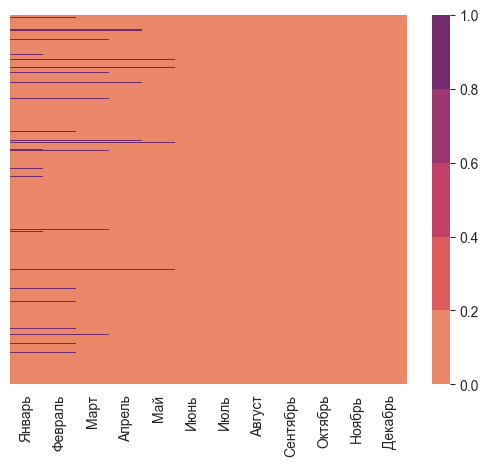

In [47]:
#налог на продажу (imp_ingreso)
sns.heatmap(imp_ingreso.isnull(),yticklabels=False,cmap=(selec_palette))
#Тепловая карта, и функция ISNULL().. смотрим  что есть пропуска.

In [48]:
imp_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Январь    1999 non-null   float64
 1   Февраль   2026 non-null   float64
 2   Март      2066 non-null   float64
 3   Апрель    2098 non-null   float64
 4   Май       2131 non-null   float64
 5   Июнь      2154 non-null   float64
 6   Июль      2156 non-null   float64
 7   Август    2156 non-null   float64
 8   Сентябрь  2156 non-null   float64
 9   Октябрь   2156 non-null   float64
 10  Ноябрь    2156 non-null   float64
 11  Декабрь   2156 non-null   float64
dtypes: float64(12)
memory usage: 202.3 KB


<Axes: >

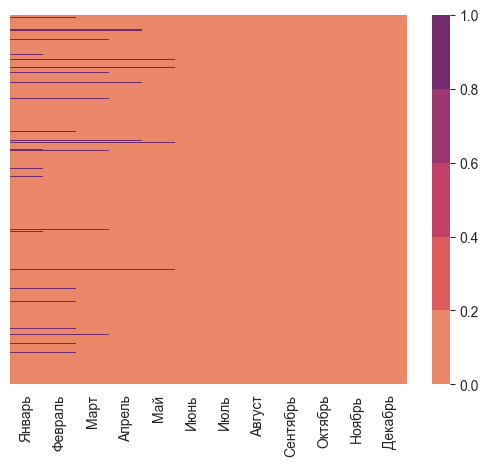

In [49]:
# налог на рабочую силу и социальное обеспечение (imp_salario)
sns.heatmap(imp_salario.isnull(),yticklabels=False,cmap=(selec_palette))

#### 4.2 удаляем компании, которые не имеют всех налогов

In [50]:

rowss = imp_ingreso[imp_ingreso.isnull().any(axis=1)]

for index, row in rowss.iterrows():
    imp_ingreso = imp_ingreso.drop(index)
    imp_salario = imp_salario.drop(index)
    df_contrib = df_contrib.drop(index)

<Axes: >

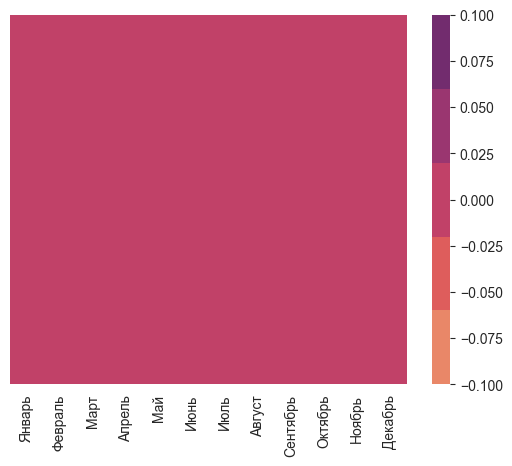

In [51]:
#налог на продажу (imp_ingreso)
sns.heatmap(imp_ingreso.isnull(),yticklabels=False,cmap=(selec_palette))
#Тепловая карта, и функция ISNULL().. смотрим  что есть пропуска.

<Axes: >

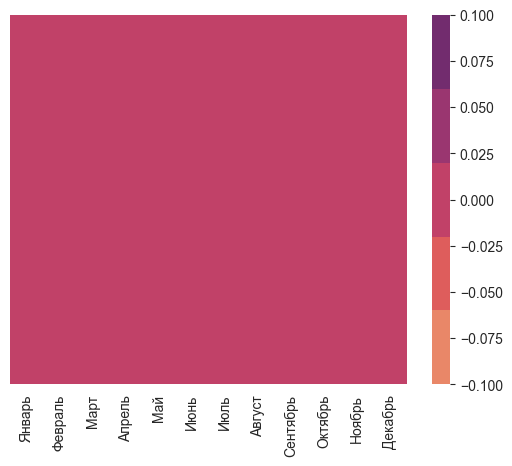

In [52]:
# налог на рабочую силу и социальное обеспечение (imp_salario)
sns.heatmap(imp_salario.isnull(),yticklabels=False,cmap=(selec_palette))

# 5. Добавление дополнительных значений

In [53]:
suma_ingreso = imp_ingreso.sum(axis=1)
suma_salario = imp_salario.sum(axis=1)

suma_ingreso_df = pd.DataFrame(suma_ingreso,columns=['Налог_год'])

suma_salario_df = pd.DataFrame(suma_salario,columns=['Налог_за_Сотруд_год'])

df_contrib = pd.concat([df_contrib, suma_ingreso_df], axis=1)
df_contrib = pd.concat([df_contrib, suma_salario_df], axis=1)


In [54]:
df_contrib

,Возраст,Компания,Деятельность,Регистрация,Сотрудники,Местонахождение,Нарушение,Налог_год,Налог_за_Сотруд_год
0,41,0,1.0,9,5,0.0,0,2696187.0,9642.5
1,43,1,1.0,7,30,1.0,0,15848172.0,55440.0
2,47,1,0.0,8,31,1.0,1,14285684.0,22505.0
3,36,0,1.0,10,6,0.0,0,3363524.0,9660.0
4,42,1,0.0,13,22,0.0,0,12041140.0,41107.5
...,...,...,...,...,...,...,...,...,...
2150,37,1,0.0,14,11,1.0,0,6552778.0,20475.0
2152,44,1,0.0,15,34,0.0,0,17725927.0,71050.0
2153,42,1,1.0,11,23,0.0,1,10527362.0,21402.5
2154,31,1,1.0,11,14,0.0,0,8132127.0,22960.0


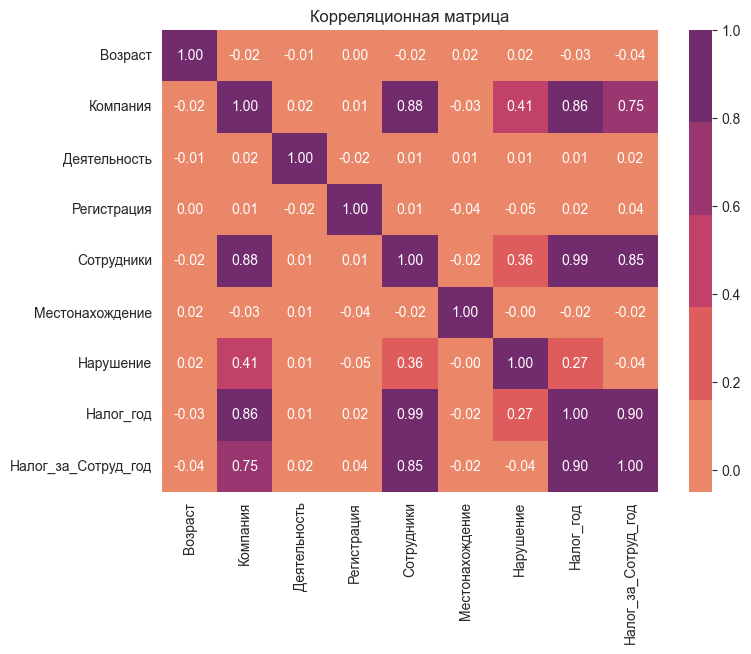

In [55]:
# Создание таблицы корреляции
correlation_matrix = df_contrib.corr()
#  Визуализация таблицы корреляции 
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=(selec_palette))
plt.title('Корреляционная матрица')
plt.show()

# 5.Определяем объектные переменные

In [56]:
y = df_contrib['Нарушение']

In [57]:
X = df_contrib.drop('Нарушение', axis =1)

In [58]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# 6 Pазбиваем набор данных на обучающие и тестовые наборы

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

# 7 Обучаем Моделей

#### 7.1 KNeighborsClassifier

In [60]:
Трекер_результатов = []

In [61]:
knn = KNeighborsClassifier(n_neighbors=3)

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100}%" )

Трекер_результатов.append({accuracy,"KNeighborsClassifier "})

Precisión del modelo: 86.16666666666667%


#### 7.2 DecisionTreeClassifier

In [64]:
model_DT = DecisionTreeClassifier()

In [65]:
model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred2 = model_DT.predict(X_test)
# точность на основе тестового набора данных
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Precisión: {accuracy2*100}%")

Трекер_результатов.append({ accuracy2,"DecisionTreeClassifier"})

Precisión: 96.0%


#### 7.3 GaussianNB

In [67]:
model_G = GaussianNB()

In [68]:
model_G.fit(X_train, y_train)

GaussianNB()

In [69]:
y_pred3 = model_G.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Precisión: {accuracy3 * 100}%")

Трекер_результатов.append({accuracy3,"GaussianNB "})

Precisión: 70.66666666666667%


#### 7.4 RandomForestClassifier

In [70]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)


In [71]:
model_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
y_pred4 = model_RF.predict(X_test)

accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Precisión: {accuracy4 * 100}%")

Трекер_результатов.append({accuracy4,"RandomForestClassifier"})


Precisión: 96.66666666666667%


#### 7.5  LogisticRegression

In [73]:
model_LG = LogisticRegression()

In [74]:
model_LG.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred5 = model_RF.predict(X_test)

accuracy5 = accuracy_score(y_test, y_pred4)
print(f"Precisión: {accuracy5 * 100}%")

Трекер_результатов.append({accuracy5,"LogisticRegression"})

Precisión: 96.66666666666667%


# 8 Точность моделей Mашинного Oбучения

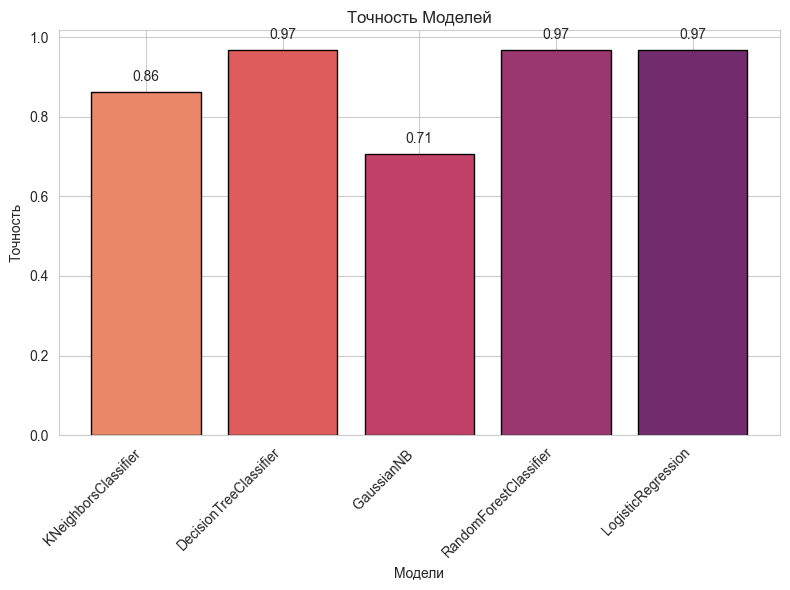

In [208]:
df_TP = pd.DataFrame(Трекер_результатов,  columns=['Tочность', 'Mодели'])

#создаем вертикальную столбчатую диаграмму
plt.figure(figsize=(8, 6))  
bars = plt.bar(df_TP['Mодели'], df_TP['Tочность'], color=(selec_palette), edgecolor='black')

# добавляем ярлыки и заголовок
plt.ylabel('Tочность')
plt.xlabel('Mодели')
plt.title('Tочность Mоделей')
# добавляем метки баллов поверх столбцов
for a in bars:
    height = a.get_height()
    plt.text(a.get_x() + a.get_width() / 2, height + 0.02, f'{height:.2f}', 
             ha='center', va='bottom')
#  поворачиваем надписи по оси x для лучшей читаемости
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 9 Нейронная сеть

In [1665]:
X = X.astype('float32')

In [1667]:
y = LabelEncoder().fit_transform(y)


In [1668]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, shuffle = True)

In [1669]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1499, 11)
(500, 11)
(1499,)
(500,)


In [1670]:
n_features = X.shape[1]

In [1671]:
model = Sequential()

In [1682]:
model.add(Dense(20, activation = 'relu', input_shape = (n_features,) ))
model.add(Dense(10, activation = 'relu'))
#выходной слой
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#обучение
history = model.fit(X_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    verbose = 1,
                    validation_data = (X_test, y_test))

# predict test_set
yhat = (model.predict(X_test)>0.5).astype("int32")

#Валидируем прогноз
score = accuracy_score(y_test, yhat)
print('Accuracy: ', score)


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9196 - loss: 0.6839 - val_accuracy: 0.9820 - val_loss: 0.6581
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9819 - loss: 0.6475 - val_accuracy: 0.9800 - val_loss: 0.6044
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9831 - loss: 0.5848 - val_accuracy: 0.9840 - val_loss: 0.5176
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9847 - loss: 0.4897 - val_accuracy: 0.9820 - val_loss: 0.4080
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9825 - loss: 0.3771 - val_accuracy: 0.9820 - val_loss: 0.2981
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9841 - loss: 0.2689 - val_accuracy: 0.9840 - val_loss: 0.2101
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9777 - loss: 0.2008 - val_accuracy: 0.9820 - val_loss: 0.1563
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9761 - loss: 0.1563 - val_accuracy: 0.9780 - val_loss:

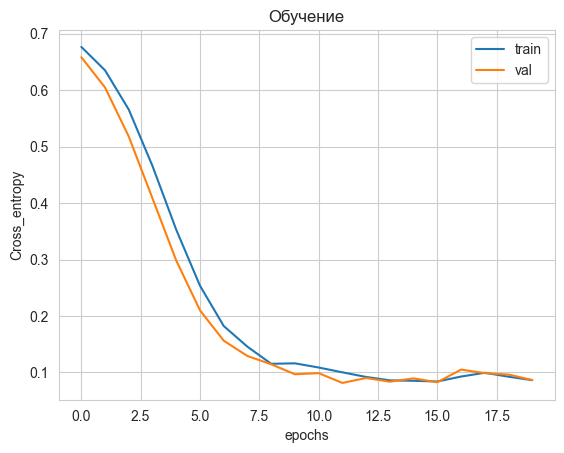

In [1683]:
pyplot.title('Обучение')
pyplot.xlabel('epochs')
pyplot.ylabel('Cross_entropy')
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'val')
pyplot.legend()
pyplot.show()


In [ ]:
model.add(Dense(32, activation = 'relu', input_shape = (n_features,) ))
model.add(Dense(32, activation = 'relu'))
#выходной слой
model.add(Dense(1, activation = 'sigmoid'))

#model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#обучение
history = model.fit(X_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    verbose = 1,
                    validation_data = (X_test, y_test))

# predict test_set
yhat = (model.predict(X_test)>0.5).astype("int32")
#predictions = (model.predict(x_test) > 0.5).astype("int32")
#yhat = model.predict_classes(X_test)

#Валидируем прогноз
score = accuracy_score(y_test, yhat)
print('Accuracy: ', score)


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8578 - loss: 0.6434 - val_accuracy: 0.9820 - val_loss: 0.5618
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9814 - loss: 0.5237 - val_accuracy: 0.9740 - val_loss: 0.4481
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9761 - loss: 0.4028 - val_accuracy: 0.9800 - val_loss: 0.3136
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9671 - loss: 0.2950 - val_accuracy: 0.9740 - val_loss: 0.2025
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9690 - loss: 0.1899 - val_accuracy: 0.9760 - val_loss: 0.1364
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9731 - loss: 0.1347 - val_accuracy: 0.9760 - val_loss: 0.1148
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9795 - loss: 0.1014 - val_accuracy: 0.9780 - val_loss: 0.0990
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9774 - loss: 0.1030 - val_accuracy: 0.9680 - val_loss:

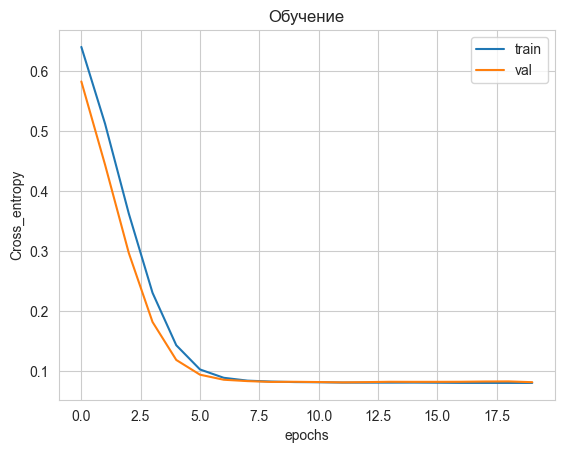

In [1685]:
pyplot.title('Обучение')
pyplot.xlabel('epochs')
pyplot.ylabel('Cross_entropy')
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'val')
pyplot.legend()
pyplot.show()

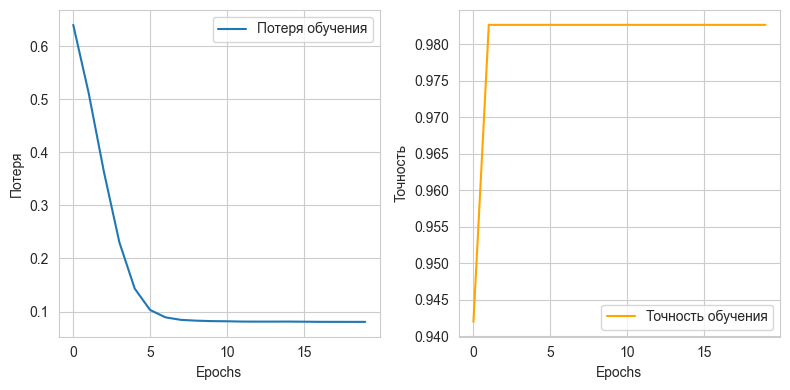

In [1690]:
# Graficar la pérdida y la precisión
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Потеря обучения')
plt.xlabel('Epochs')
plt.ylabel('Потеря')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точность обучения', color ='orange')
plt.xlabel('Epochs')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()

# Сохраняем Модель LogisticRegression

In [76]:
pickle.dump(model_LG, open('LG_model.pkl', 'wb'))